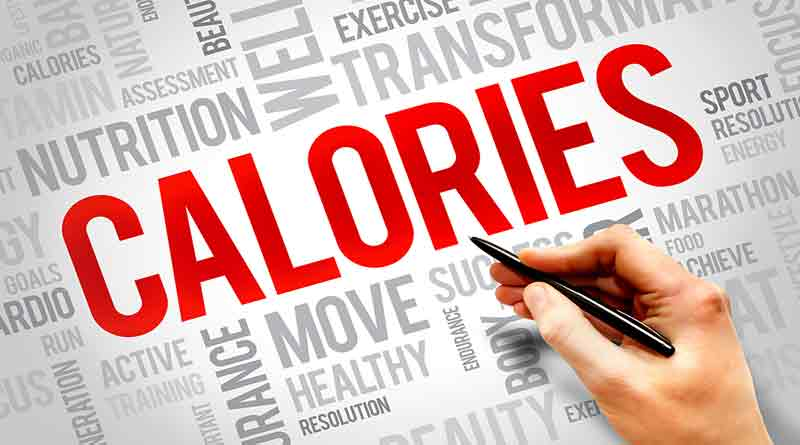

# Calories Burnt 

### Import appropriate libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv(r'C:\Users\ZMZM\Desktop\Dataset\calories.csv') 
df.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
5,15130815,female,36,151,50,23,96,40.7,123
6,19602372,female,33,158,56,22,95,40.5,112
7,11117088,male,41,175,85,25,100,40.7,143
8,12132339,male,60,186,94,21,97,40.4,134
9,17964668,female,26,146,51,16,90,40.2,72


In [3]:
df.shape

(15000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### Encoding the column from categorical to numerical

In [6]:
df.replace({'Gender':{'male':0, 'female':1}}, inplace=True)

In [7]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193,86,11,92,40.4,45
14996,17212577,1,27,165,65,6,85,39.2,23
14997,17271188,1,43,159,58,16,90,40.1,75
14998,18643037,0,78,193,97,2,84,38.3,11


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.0 MB


In [9]:
# convert the height from 'cm' to "m"

df['Height'] = df['Height'] / 100

In [10]:
# creat new column of " Body mass index" to help the model achieve greater accuracy.
df['bmi'] = df['Weight'] / (df['Height']*df['Height'])

### Splitting the data into feature & target

In [11]:
X = df.drop(columns=['Calories', 'User_ID'], axis=1)
y = df['Calories']

In [12]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,bmi
0,0,68,1.90,94,29,105,40.8,26.038781
1,1,20,1.66,60,14,94,40.3,21.773842
2,0,69,1.79,79,5,88,38.7,24.655910
3,1,34,1.79,71,13,100,40.5,22.159109
4,1,27,1.54,58,10,81,39.8,24.456063
...,...,...,...,...,...,...,...,...
14995,1,20,1.93,86,11,92,40.4,23.087868
14996,1,27,1.65,65,6,85,39.2,23.875115
14997,1,43,1.59,58,16,90,40.1,22.942130
14998,0,78,1.93,97,2,84,38.3,26.040968


In [13]:
y

0        231
1         66
2         26
3         71
4         35
        ... 
14995     45
14996     23
14997     75
14998     11
14999     98
Name: Calories, Length: 15000, dtype: int64

## Splitting the data into Training data & Testing Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 8) (12000, 8) (3000, 8)


## 🟢 Machine Learning Model Training (XGBoost Regressor)

In [16]:
regressor = XGBRegressor()

In [17]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluation

In [18]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [19]:
# R squared Value
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [20]:
print('R Squared value = ', r2_train)

R Squared value =  0.9995768619141533


In [21]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [22]:
# R squared Value
r2_test = metrics.r2_score(y_test, test_data_prediction)

In [23]:
print('R Squared value = ', r2_test)

R Squared value =  0.9987367744792888


### 🤖 Making a Predictive System

In [25]:
input_data = (0,25,1.48,65,30,130,40,29.67)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print('The value of calories is :', prediction[0])

The value of calories is : 252.37218


#

# Regards, Tariq Ibrahim